# Data Cleaning and Preparation

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\05 EDA1\Cardiotocographic.csv') ## load the data set

In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.columns ## check the columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [5]:
df.info() ## general info shows the all the columns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
df.size ## total data is 29764

29764

In [7]:
df.shape ## this shows there are 2126 rows and 14 columns

(2126, 14)

##Handle missing values

In [8]:
df.isnull().sum() ## suggests as least 21 rows have missing values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
## either we can drop the rows with missing values or we can fill the null values with the median

In [10]:
df.duplicated().any() ## suggests that there is a duplicate data

True

In [11]:
df[df.duplicated()] ## two rows are duplicate

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [12]:
df.drop_duplicates(inplace=True) ## this will drop the duplicate rows permanently

In [13]:
df.duplicated().any() ## to confirm the duplicates have been removed

False

In [14]:
median_LB=df['LB'].median() ## to calculate median of column LB
df['LB']=df['LB'].fillna(median_LB)  ## to fill null values in column LB with median of LB

In [15]:
df.isnull().sum() ## shows there is no null value in column LB

LB           0
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [16]:
## proceeding with second option we can remove the rows having null values

In [17]:
df.dropna(inplace=True) ## to permanently drop the rows having null values

In [18]:
df.isnull().sum() ## shows all the missing values have been removed

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

##Identify and correct any inconsistencies in data types

In [19]:
## since all the columns shows Dtype as float64, there is no string

##Detect and treat outliers if necessary

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

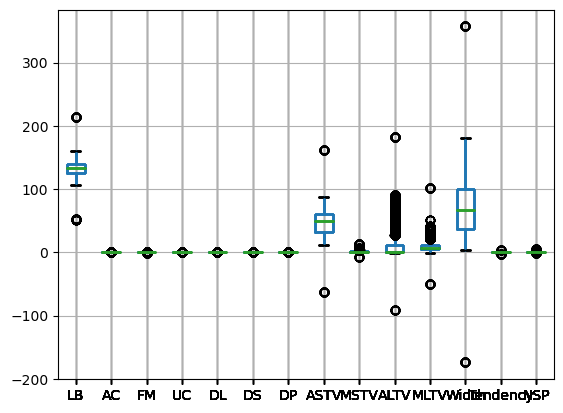

In [21]:
num_col=[i for i in df.columns if df[i].dtypes!='O']
for i in num_col:
    df.boxplot(column=num_col)
plt.show()      ## this ius used to visualize boxplot of every column to check the outliers however we will visualize
                ## the boxplot one by one and treat the outliers

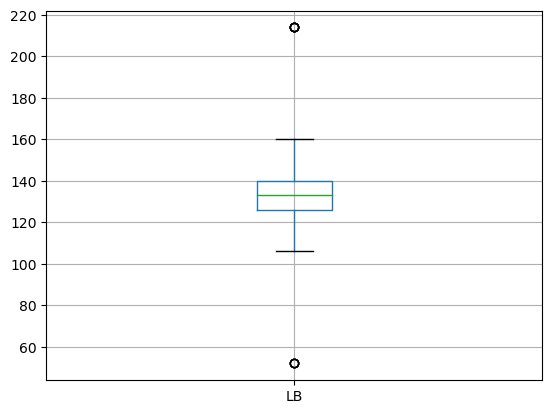

In [22]:
df.boxplot('LB')
plt.show()   ## this confirms LB column has outliers

In [23]:
df_raw=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\05 EDA1\Cardiotocographic.csv')
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    condition=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return condition

In [24]:
index_list=[]
for feature in ['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']:
    index_list.extend(outliers(df_raw,feature))

In [25]:
def remove(df,condition):
    condition=sorted(set(condition))
    df=df.drop(condition)
    return df

In [26]:
df_new=remove(df_raw,index_list)

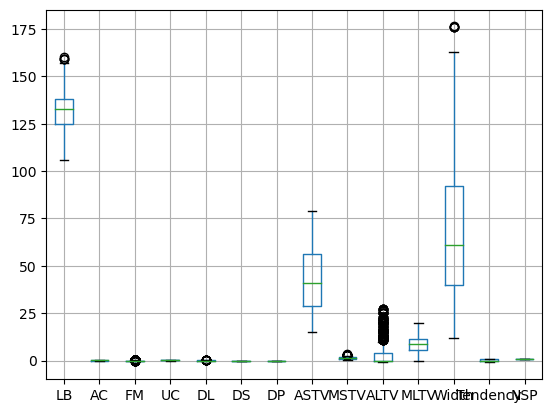

In [27]:
df_new.boxplot()
plt.show()

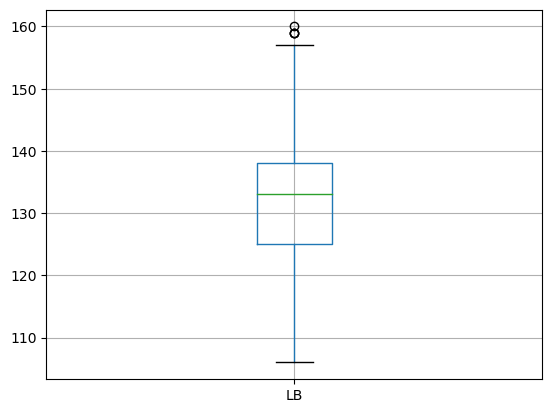

In [28]:
df_new.boxplot('LB')
plt.show()

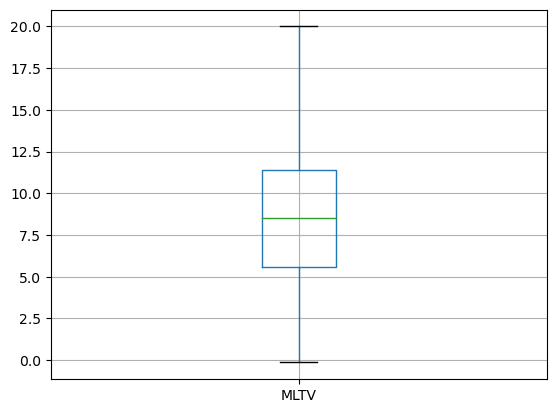

In [29]:
df_new.boxplot('MLTV')
plt.show()

# Statistical Summary

In [30]:
df_raw.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


# Data Visualization

In [31]:
# Histograms

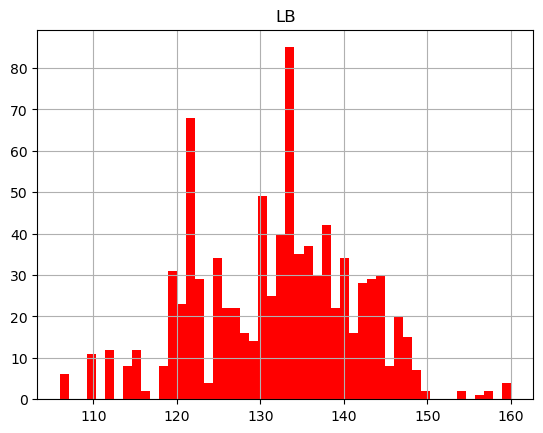

In [36]:
df_new.hist('LB',bins=50,color='red')
plt.show();

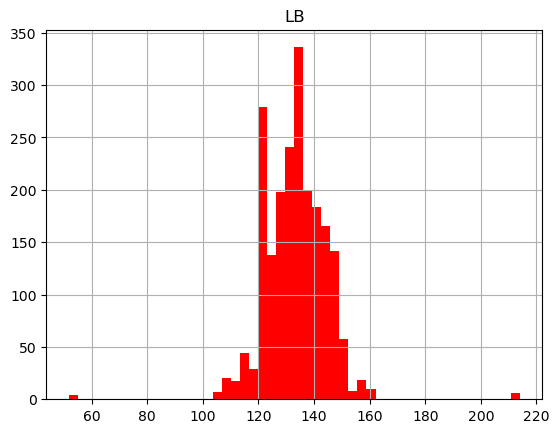

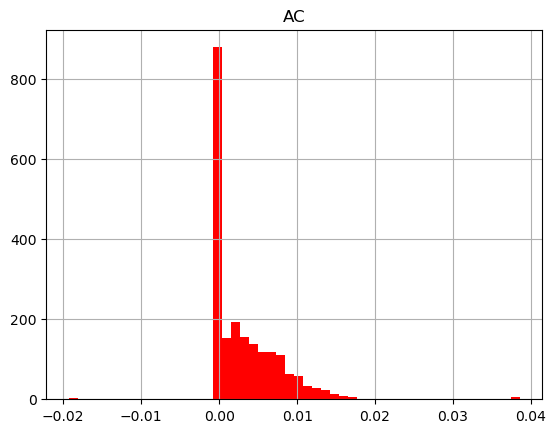

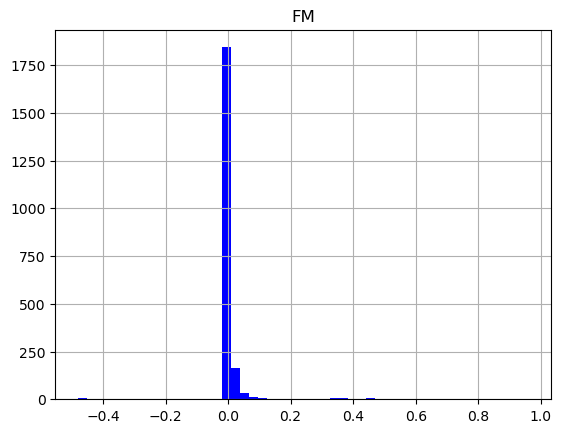

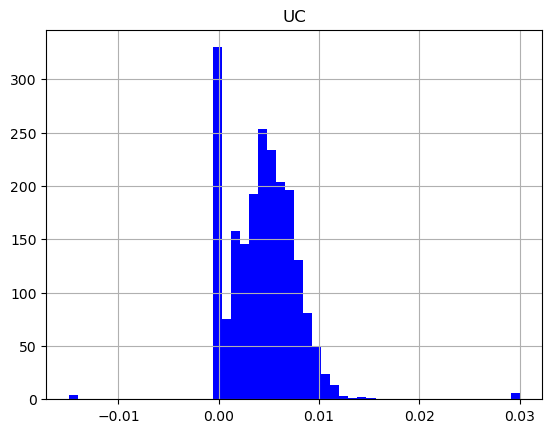

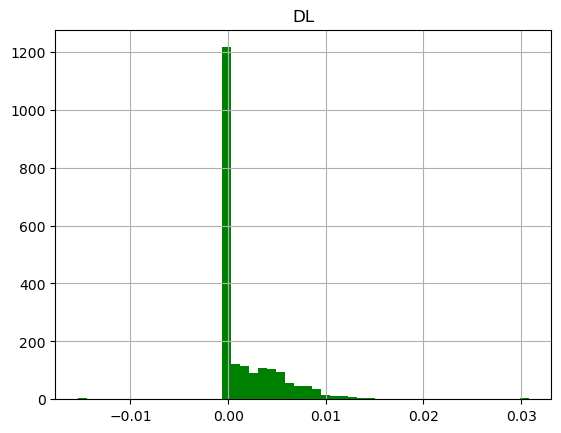

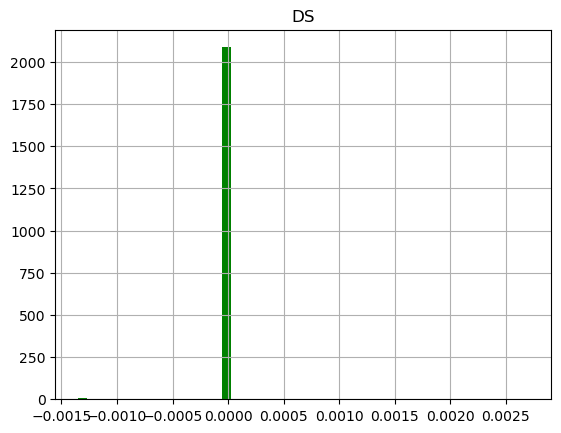

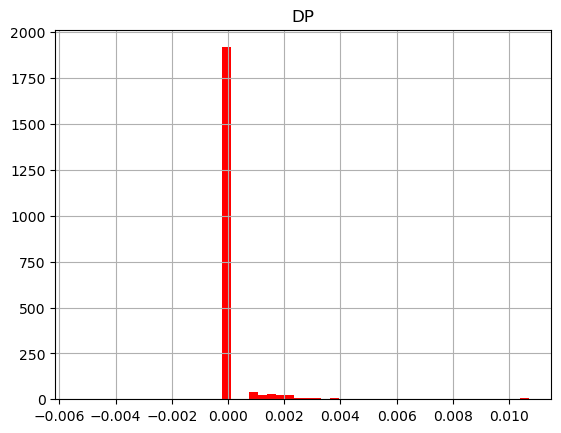

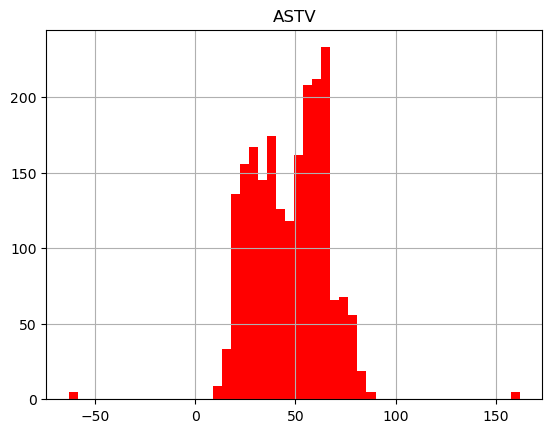

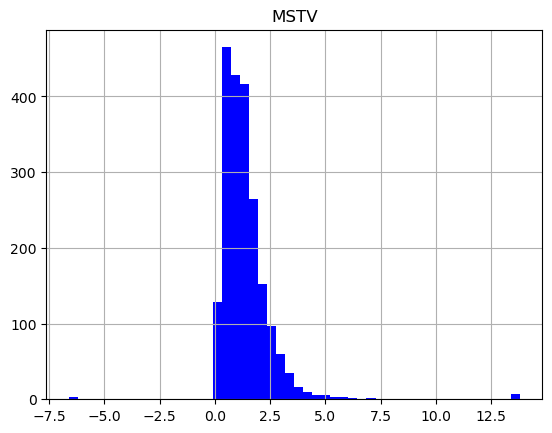

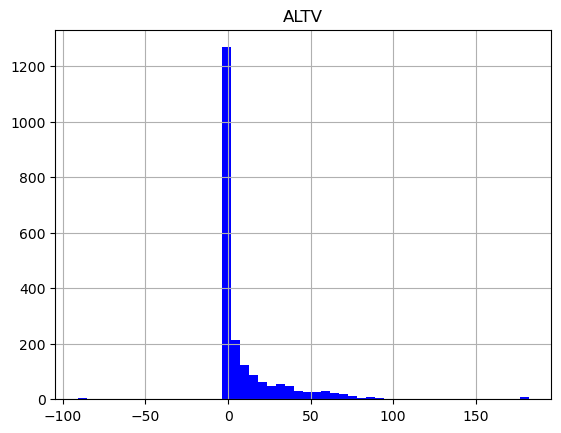

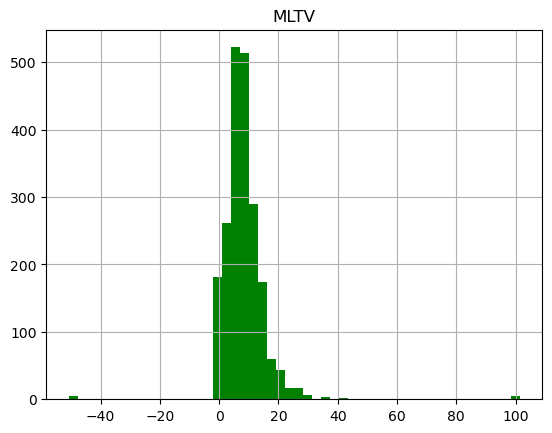

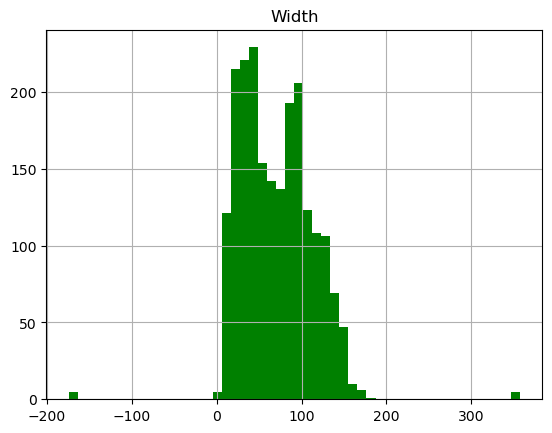

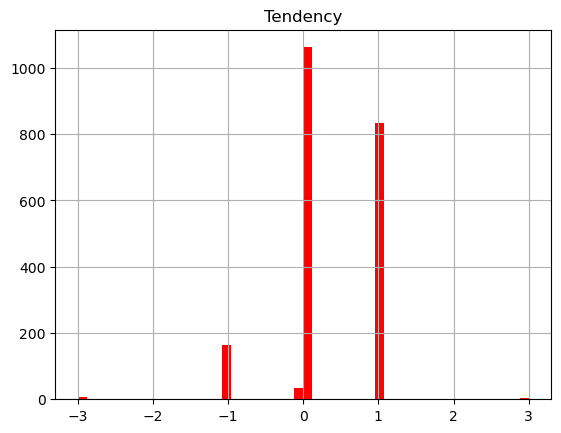

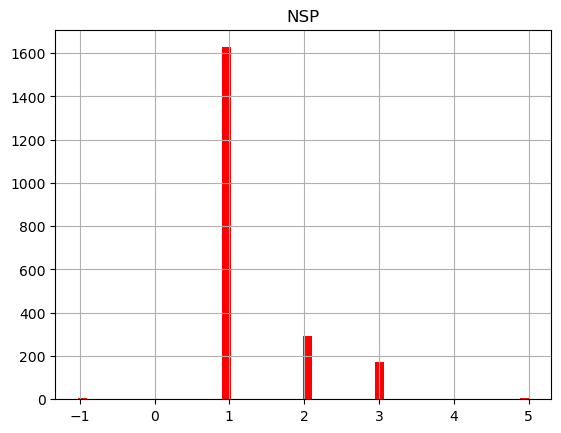

In [48]:
df.hist('LB',bins=50,color='red')
df.hist('AC',bins=50,color='red')
df.hist('FM',bins=50,color='blue')
df.hist('UC',bins=50,color='blue')
df.hist('DL',bins=50,color='green')
df.hist('DS',bins=50,color='green')
df.hist('DP',bins=50,color='red')
df.hist('ASTV',bins=50,color='red')
df.hist('MSTV',bins=50,color='blue')
df.hist('ALTV',bins=50,color='blue')
df.hist('MLTV',bins=50,color='green')
df.hist('Width',bins=50,color='green')
df.hist('Tendency',bins=50,color='red')
df.hist('NSP',bins=50,color='red')
plt.show();

In [43]:
## Since there is no categorical column in the given dataset, pie chart cannot be displayed

In [49]:
# correlation heatmaps

In [50]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [51]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.064452,0.018810,-0.167012,-0.126981,-0.005439,-0.047726,0.242435,-0.170134,0.210955,-0.003225,-0.118375,0.237112,0.132008
AC,-0.064452,1.000000,0.010127,0.069820,-0.095626,-0.033632,-0.084644,-0.231114,0.127010,-0.274055,-0.106308,0.238422,0.032399,-0.317113
FM,0.018810,0.010127,1.000000,-0.053139,0.009753,0.029899,0.121259,-0.032931,0.017488,-0.012345,-0.006157,0.097133,-0.018410,0.073997
UC,-0.167012,0.069820,-0.053139,1.000000,0.191473,-0.006957,0.070504,-0.182358,0.190295,-0.228399,-0.048862,0.106787,-0.067098,-0.185953
DL,-0.126981,-0.095626,0.009753,0.191473,1.000000,0.058625,0.145338,-0.071342,0.410270,-0.186882,-0.165494,0.409793,-0.023838,0.025179
DS,-0.005439,-0.033632,0.029899,-0.006957,0.058625,1.000000,0.004282,0.008441,0.016165,-0.004406,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.084644,0.121259,0.070504,0.145338,0.004282,1.000000,0.038076,0.119911,-0.077865,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.242435,-0.231114,-0.032931,-0.182358,-0.071342,0.008441,0.038076,1.000000,-0.293322,0.357478,-0.219922,-0.208439,-0.011367,0.422515
MSTV,-0.170134,0.127010,0.017488,0.190295,0.410270,0.016165,0.119911,-0.293322,1.000000,-0.291405,0.028807,0.435563,-0.036849,-0.095143
ALTV,0.210955,-0.274055,-0.012345,-0.228399,-0.186882,-0.004406,-0.077865,0.357478,-0.291405,1.000000,-0.107475,-0.346960,0.036552,0.365708


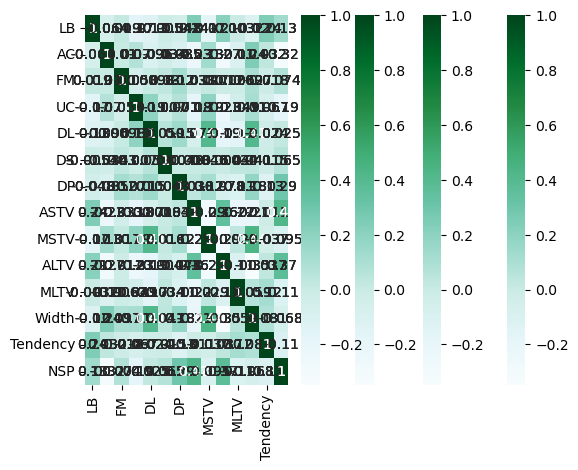

In [55]:
sns.heatmap(df.corr(),annot=True,cmap='BuGn')
plt.show()

In [56]:
## since the heat map is not clear we can check this for different pair of columns

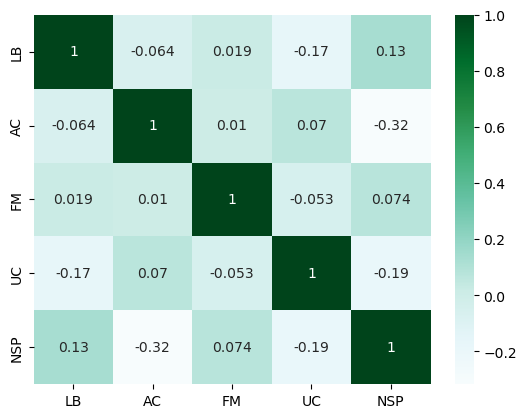

In [65]:
sns.heatmap(df[['LB','AC','FM','UC','NSP']].corr(),annot=True,cmap='BuGn')
plt.show();

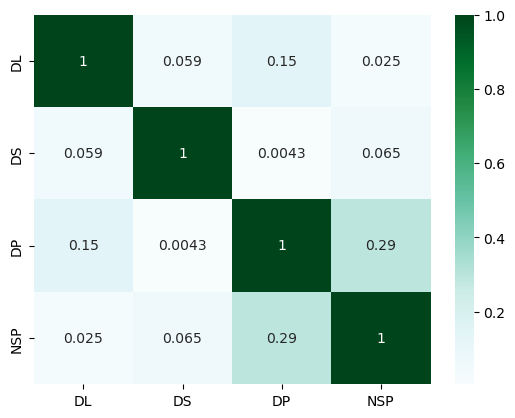

In [66]:
sns.heatmap(df[['DL','DS','DP','NSP']].corr(),annot=True,cmap='BuGn')
plt.show();

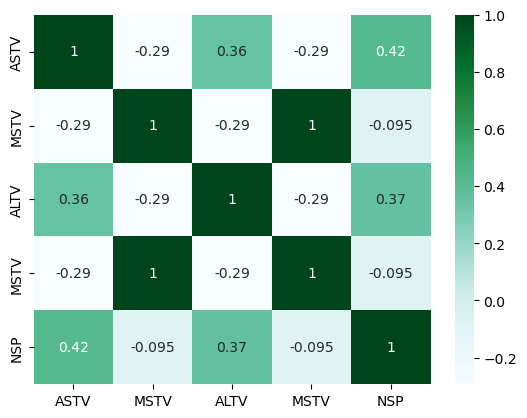

In [67]:
sns.heatmap(df[['ASTV','MSTV','ALTV','MSTV','NSP']].corr(),annot=True,cmap='BuGn')
plt.show();

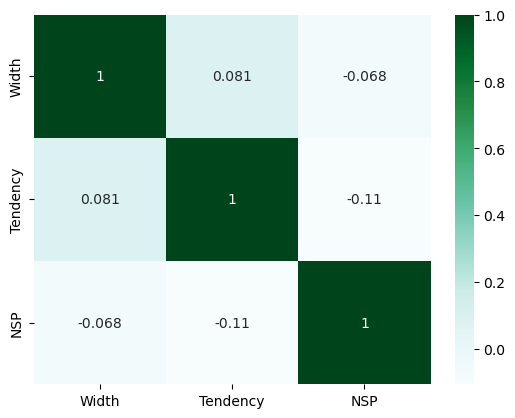

In [68]:
sns.heatmap(df[['Width','Tendency','NSP']].corr(),annot=True,cmap='BuGn')
plt.show();

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


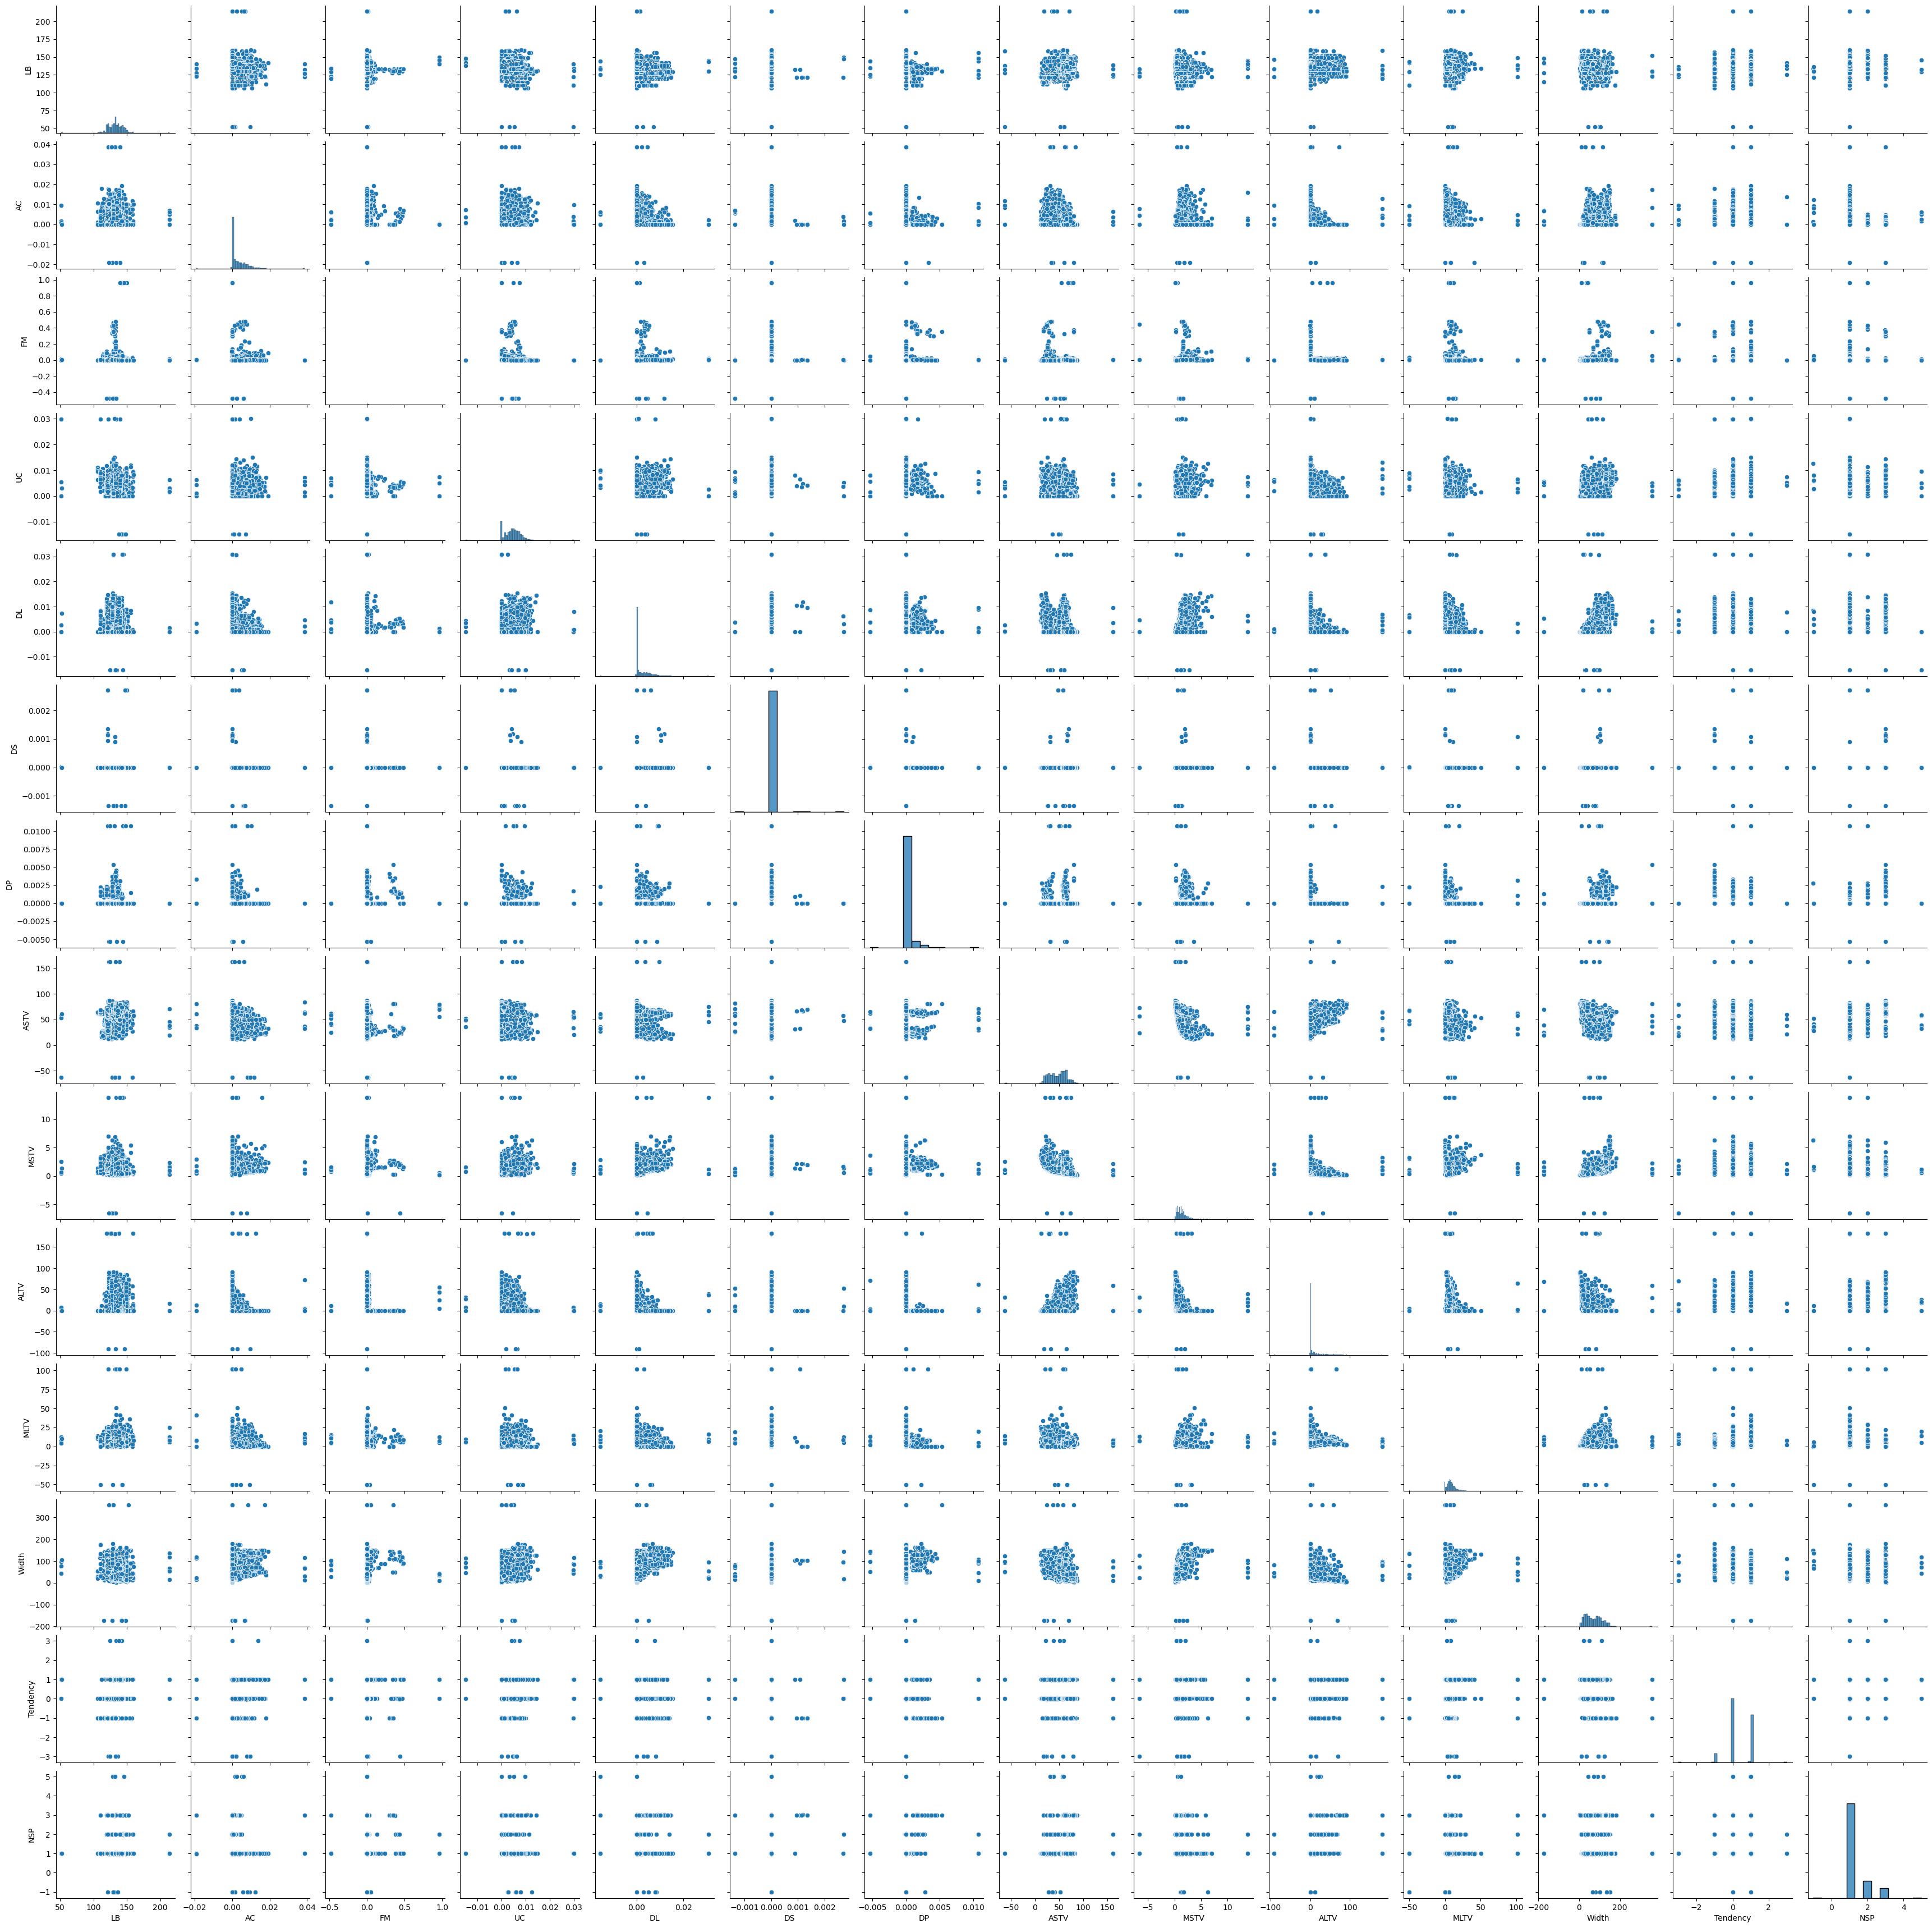

In [69]:
sns.pairplot(df)
plt.show();

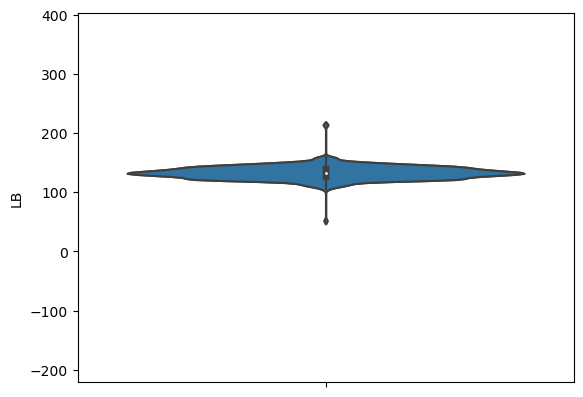

In [72]:
sns.violinplot(data=df,y='LB')
plt.show();

In [73]:
## ASTV and ALTV hold a decent positive correlation with NSP. Remaining columns extremely low correlation with NSP.
## If in this dataset, NSP is our target column then we can ignore the features having extremely low correlation before
## giving data to machine learning algorithm. AC and DP column cannot be ignored as they show better correlation with
## NSP as compared to other features.

In [75]:
# Conclusion - The given dataset contains null values, duplicate rows, outliers as well as some features which does not
## share strong correlation with NSP (if we consider NSP as target column). We need to treat this data as per above methods
## before passing the data to machine learning algorithms so as to get best result.